In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import tensorflow as tf

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray  # Corrected to rgb2gray
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 128)

Found 4098 images belonging to 4 classes.


In [9]:
valid_dataset = valid_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 1023 images belonging to 4 classes.


100%|██████████| 5/5 [00:30<00:00,  6.08s/it]


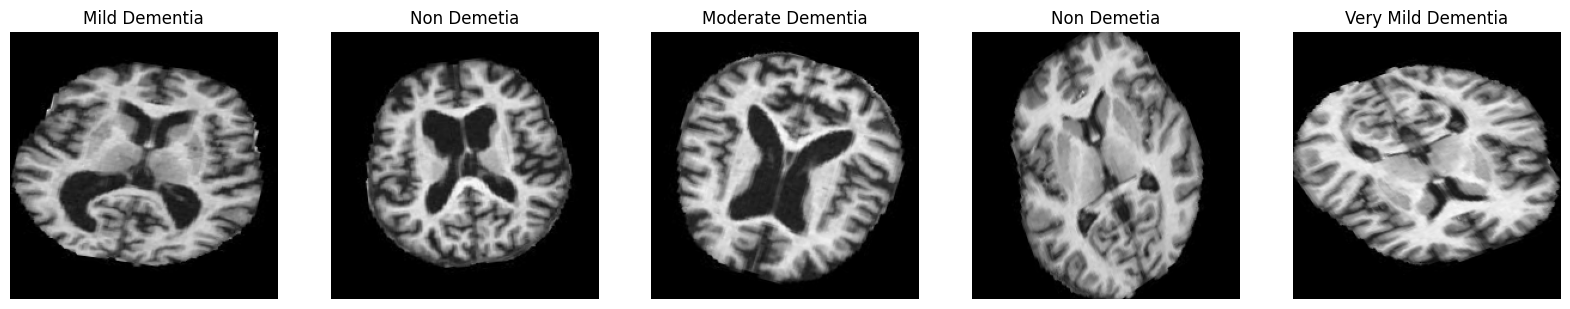

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(100)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [13]:
import tensorflow as tf # Make sure to import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model

# Define input shape for the model
input_shape = (224, 224, 3)

# Load the InceptionV3 model without the top classification layers
base_model = InceptionV3(input_shape=input_shape, include_top=False, weights="imagenet")

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Define input tensor and stack new layers on top of the base model
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)  # Set training=False to freeze base_model during training
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(2048, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)  # Adjust the number of classes as needed

# Create the final model
model = Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 51200)          │       204,800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │   104,859,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_95 (Activation)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,981,796 (492.03 MB)

 Trainable params: 107,070,468 (408.44 MB)

 Non-trainable params: 21,911,328 (83.59 MB)

In [23]:
OPT = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)


In [25]:
filepath = './best_weights.keras' # Change the file extension to .keras

earlystopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, # Pass the updated filepath
                                monitor = 'val_auc',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3  # Using InceptionV3 for GoogleNet
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# ... (Previous code remains the same) ...
# Modify the model architecture
# Use GlobalAveragePooling2D instead of Flatten
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)  # Replace Flatten() with GlobalAveragePooling2D()
x = Dropout(0.5)(x)
# ... (Rest of the model architecture remains the same) ...

# ... (Compile and fit as before) ...

model_history = model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs=5,
                        callbacks=callback_list,
                        verbose=1)

Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - auc: 0.7346 - loss: 1.5709
Epoch 1: val_auc improved from -inf to 0.51213, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 431s 11s/step - auc: 0.7359 - loss: 1.5658 - val_auc: 0.5121 - val_loss: 5.0432
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - auc: 0.8126 - loss: 1.1814
Epoch 2: val_auc improved from 0.51213 to 0.66115, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 330s 9s/step - auc: 0.8126 - loss: 1.1803 - val_auc: 0.6611 - val_loss: 2.1550
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - auc: 0.8219 - loss: 1.0935
Epoch 3: val_auc did not improve from 0.66115
33/33 ━━━━━━━━━━━━━━━━━━━━ 325s 9s/step - auc: 0.8220 - loss: 1.0929 - val_auc: 0.6082 - val_loss: 2.0591
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - auc: 0.8385 - loss: 1.0052
Epoch 4: val_auc improved from 0.66115 to 0.69592, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 342s 10s/step - auc: 0.8387 - loss: 1.0046 - val_

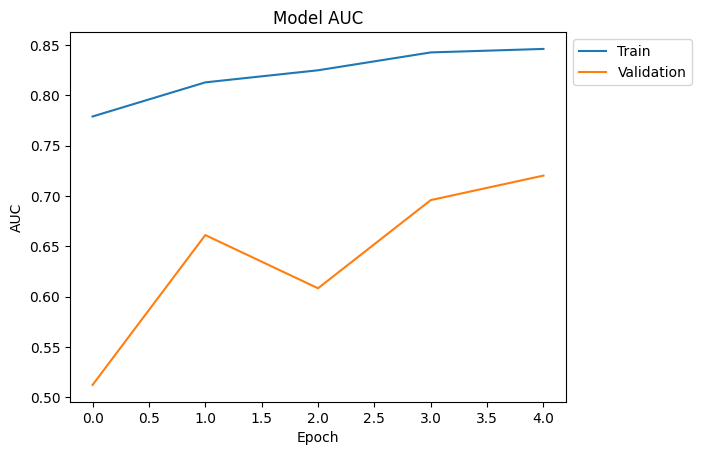

In [29]:
plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

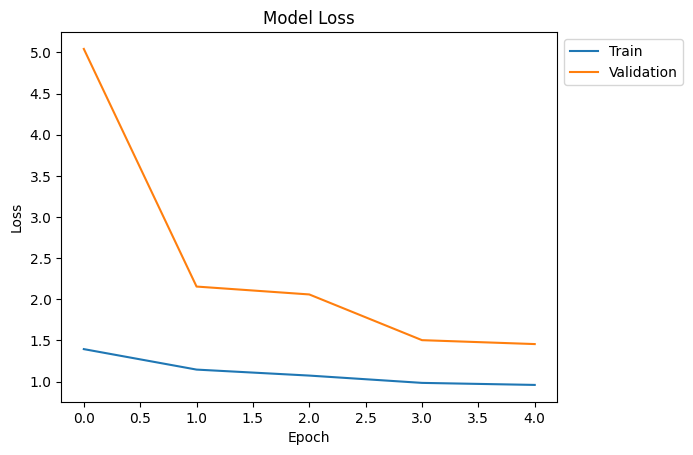

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [33]:
test_dataset  = test_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 1279 images belonging to 4 classes.


In [35]:
model.evaluate(test_dataset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - auc: 0.8387 - loss: 0.9167


[0.9236143231391907, 0.8395189642906189]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
49.1 % chances are there that the image is VeryMildDemented


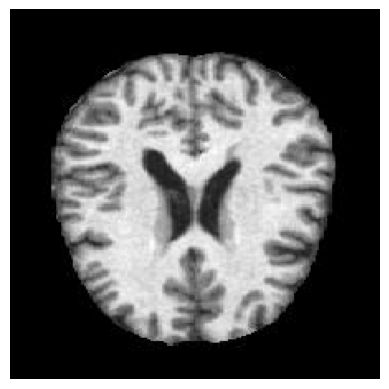

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r"D:\CODING\Alzheimer_s Dataset\test\NonDemented\26 (84).jpg", target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Replace predict_classes with predict and argmax for class prediction
predictions = model.predict(img) # Get the model's predictions
answer = np.argmax(predictions)  # Get the index of the class with the highest probability

probability = round(np.max(predictions)*100,2)

print(probability, '% chances are there that the image is',idc[answer])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
42.95 % chances are there that the image is VeryMildDemented


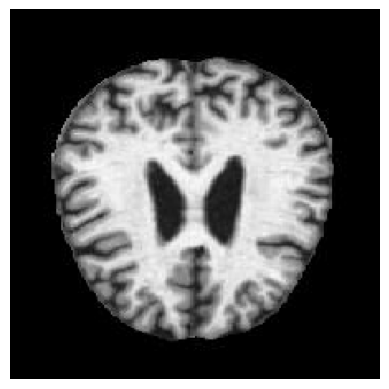

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r"D:\CODING\Alzheimer_s Dataset\test\VeryMildDemented\32.jpg", target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Replace predict_classes with predict and argmax for class prediction
predictions = model.predict(img) # Get the model's predictions
answer = np.argmax(predictions)  # Get the index of the class with the highest probability

probability = round(np.max(predictions)*100,2)

print(probability, '% chances are there that the image is',idc[answer])

In [41]:
def plot_confusion_matrix(true_lab,predict_lab,classes,path):
  matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
  ax = plt.subplot()
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(classes)
  ax.yaxis.set_ticklabels(classes)
  plt.savefig(f'{path}confusion_matrix.png')

In [43]:
def dump_text(text,path):
  text_file = open(path, "w")
  text_file.write(text)
  text_file.close()

In [45]:
test_generator = test_datagen.flow_from_directory(
    r'D:\CODING\Alzheimer_s Dataset\test',  # Replace with the actual path
    target_size=(224, 224),  # Change this to 224x224 to match DenseNet121's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1279 images belonging to 4 classes.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step


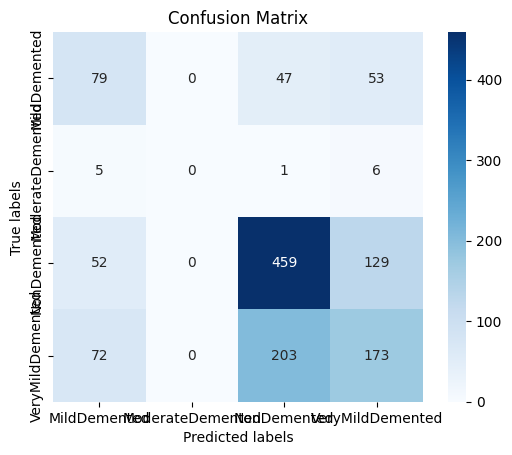

Precision per class: {'MildDemented': 0.3798076923076923, 'ModerateDemented': 0.0, 'NonDemented': 0.6464788732394366, 'VeryMildDemented': 0.4792243767313019}

Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.38      0.44      0.41       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.65      0.72      0.68       640
VeryMildDemented       0.48      0.39      0.43       448

        accuracy                           0.56      1279
       macro avg       0.38      0.39      0.38      1279
    weighted avg       0.54      0.56      0.55      1279



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# Function to plot confusion matrix and precision
def plot_confusion_matrix(true_lab, predicted_lab, classes, path):
    matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
    
    # Plotting the confusion matrix using seaborn heatmap
    ax = plt.subplot()
    sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
    
    # Labels, titles, and other visual details
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Save plot to file if needed
    plt.savefig(path)
    plt.show()
    
    # Calculate precision for each class
    precision = precision_score(true_lab, predicted_lab, average=None)
    print("Precision per class:", dict(zip(classes, precision)))
    
    # Display classification report for detailed metrics
    print("\nClassification Report:\n", classification_report(true_lab, predicted_lab, target_names=classes))

# Confusion Matrix for DenseNet121
p = model.predict(test_generator)
predicted_lab = p.argmax(axis=-1)
true_lab = test_generator.classes

# Use the function and provide the file path
plot_confusion_matrix(true_lab, predicted_lab, list(test_generator.class_indices.keys()), 'confusion_matrix.png')